In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

In [2]:



#input_dir = 'bootstrap-toy-study6b-1d-1a-badres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-perfect'

#input_dir = 'bootstrap-toy-study6b-1d-1a'
#input_dir = 'bootstrap-toy-study6b-1d-1a-nb1000'

#input_dir = 'simple-pdf-toy-study6b-1d-1a-1k'

#input_dir = 'fit-pdf-toy-study-1d-1a'

#input_dir = 'hist-pdf-toy-study-1d-1a'

#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution-5k-toys'

#input_dir = 'bootstrap-toy-study8a-1d-1c'

#input_dir = 'bootstrap-toy-study8a-1d-1d'




#input_dir = 'hist-pdf-toy-study-1d-1a-perfect'
#input_dir = 'hist-pdf-toy-study-1d-1a-goodres'
#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution'
#input_dir = 'hist-pdf-toy-study-1d-1b-mediumbad'


#input_dir = 'bootstrap-toy-study8a-1d-1d-perfect'
#input_dir = 'bootstrap-toy-study8a-1d-1d'
#input_dir = 'bootstrap-toy-study8a-1d-1d-nominal-resolution'
input_dir = 'bootstrap-toy-study8a-1d-1d-gpu0'




hist_nbins = 20
hist_xlow = -3.
hist_xhigh = 3.



with open( '%s/train-and-true-samples.npy' % input_dir, 'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    
print('\n\n')
print(' shape of train_pts:  %s' % str(train_pts.shape))
print(' shape of true_pts:   %s' % str(true_pts.shape))
print('\n\n')






 shape of train_pts:  (100000, 1)
 shape of true_pts:   (10000, 1)





In [3]:


with open( "%s/omnifold-output-weights.npy" % input_dir,'rb') as f :
    main_sample_omnifold_weights = np.load(f)

main_sample_omnifold_weights = np.clip( main_sample_omnifold_weights, 1e-11, 1e11)

print('\n\n')
print(' shape of main_sample_omnifold_weights: %s' % str(main_sample_omnifold_weights.shape))
print('\n\n')





 shape of main_sample_omnifold_weights: (100000,)





In [4]:
main_sample_omnifold_weights

array([0.1166674 , 0.08762885, 0.12254042, ..., 0.09664661, 0.13070659,
       0.11742485])

In [5]:
dummy_weights = np.ones( len(train_pts))
dummy_weights = (len(true_pts) / len(train_pts)) * dummy_weights

In [6]:
dummy_weights

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

In [7]:
dummy_weights.shape

(100000,)

<function matplotlib.pyplot.show(close=None, block=None)>

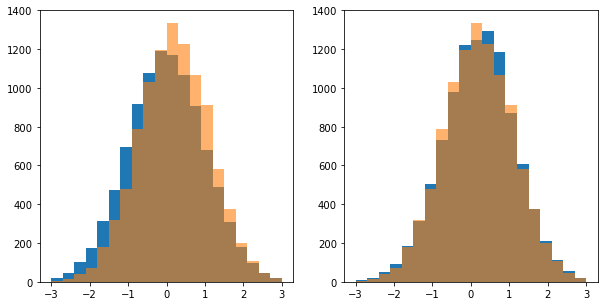

In [8]:
fig,ax = plt.subplots( 1, 2, figsize=(2*5,5))

ax[0].hist( train_pts[:,0], bins=hist_nbins, weights=dummy_weights, range=[hist_xlow, hist_xhigh] )
ax[0].hist( true_pts[:,0], bins=hist_nbins, range=[hist_xlow, hist_xhigh], alpha=0.6 )

ax[1].hist( train_pts[:,0], bins=hist_nbins, weights=main_sample_omnifold_weights, range=[hist_xlow, hist_xhigh] )
ax[1].hist( true_pts[:,0], bins=hist_nbins, range=[hist_xlow, hist_xhigh], alpha=0.6 )

plt.show

In [9]:
n_samples = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d bootstrap samples.\n\n" % n_samples )



 Found 586 bootstrap samples.




 boot   0 weights: [0.1185423  0.0876058  0.11989613 ... 0.09525693 0.11911066 0.1185365 ]
 boot   1 weights: [0.11564698 0.09451943 0.12074247 ... 0.10647583 0.11901799 0.1153959 ]
 boot   2 weights: [0.11874784 0.09742378 0.11603869 ... 0.11005162 0.12418104 0.11974426]
 boot   3 weights: [0.11892768 0.0945404  0.1163866  ... 0.1034372  0.1138299  0.11807981]
 boot   4 weights: [0.11718314 0.09504857 0.11905496 ... 0.10284925 0.11915078 0.11765985]
 boot   5 weights: [0.11289311 0.09544735 0.11376688 ... 0.10603421 0.11991099 0.11323348]
 boot   6 weights: [0.12328385 0.09240539 0.11780632 ... 0.09477363 0.12027341 0.12398173]
 boot   7 weights: [0.12101512 0.09247804 0.11432338 ... 0.09469834 0.1186632  0.12070433]
 boot   8 weights: [0.10702791 0.09247025 0.11734179 ... 0.11169339 0.1189453  0.10816886]
 boot   9 weights: [0.11800588 0.10280579 0.11446614 ... 0.0828946  0.12177884 0.11889757]
 boot  10 weights: [0.11439833 0.0970635  0.12024371 ... 0.10242671 0.11523662 0.11380767]

 boot  97 weights: [0.10219482 0.10487936 0.11906551 ... 0.09273798 0.12180552 0.10396991]
 boot  98 weights: [0.11651411 0.08749889 0.11863108 ... 0.12317759 0.11649569 0.11547218]
 boot  99 weights: [0.10787029 0.09157192 0.12919672 ... 0.1117721  0.12074829 0.1079729 ]
 boot 100 weights: [0.11267648 0.09653883 0.12310522 ... 0.10340305 0.12357619 0.11394714]
 boot 101 weights: [0.11174296 0.09602893 0.11795902 ... 0.10783088 0.1187932  0.113208  ]
 boot 102 weights: [0.12058619 0.09332855 0.11302399 ... 0.1005536  0.1167376  0.12025319]
 boot 103 weights: [0.10914536 0.09986491 0.12320319 ... 0.10506181 0.12495655 0.11140022]
 boot 104 weights: [0.10498707 0.10218686 0.12391896 ... 0.10999899 0.11807128 0.10558963]
 boot 105 weights: [0.10612611 0.09508561 0.13630611 ... 0.10057208 0.12443851 0.10746026]
 boot 106 weights: [0.12470529 0.09610332 0.1223802  ... 0.1009327  0.12225956 0.12478753]
 boot 107 weights: [0.10044251 0.09773256 0.12100997 ... 0.12780536 0.11429985 0.10157394]

 boot 201 weights: [0.11903428 0.09677651 0.11579879 ... 0.10217019 0.11584071 0.11809782]
 boot 202 weights: [0.1226904  0.09681766 0.12159393 ... 0.08927889 0.12273669 0.12226607]
 boot 203 weights: [0.12455394 0.09033711 0.11676033 ... 0.10842136 0.12274147 0.12429498]
 boot 204 weights: [0.10639111 0.09471946 0.12069114 ... 0.10065403 0.1297581  0.10749159]
 boot 205 weights: [0.12318195 0.092333   0.11254527 ... 0.10910792 0.12552553 0.12538348]
 boot 206 weights: [0.11278134 0.09515928 0.12124957 ... 0.1166556  0.11650934 0.11311172]
 boot 207 weights: [0.11576338 0.09731145 0.1147529  ... 0.10195705 0.11923991 0.1159138 ]
 boot 208 weights: [0.11053349 0.09449026 0.12545676 ... 0.10743412 0.12563878 0.11115688]
 boot 209 weights: [0.11180944 0.09575753 0.1222793  ... 0.11091892 0.11816479 0.11063301]
 boot 210 weights: [0.11288841 0.09253973 0.12926323 ... 0.10580252 0.11491897 0.11219949]
 boot 211 weights: [0.11295921 0.0911102  0.12417173 ... 0.10721718 0.11482977 0.11284891]

 boot 298 weights: [0.10996684 0.09351481 0.12163749 ... 0.10190507 0.11632194 0.11056682]
 boot 299 weights: [0.10900137 0.09213312 0.12027229 ... 0.11250661 0.12382375 0.11075504]
 boot 300 weights: [0.10881033 0.08976818 0.12355319 ... 0.09340956 0.12108657 0.10987851]
 boot 301 weights: [0.11150561 0.09963989 0.1188942  ... 0.10799948 0.11988546 0.11369193]
 boot 302 weights: [0.1266983  0.09248908 0.11399606 ... 0.10515631 0.1213663  0.12609962]
 boot 303 weights: [0.11921909 0.08543564 0.1212942  ... 0.105019   0.1245126  0.11903692]
 boot 304 weights: [0.11055291 0.09958181 0.12692128 ... 0.11058867 0.11392515 0.11033064]
 boot 305 weights: [0.12824744 0.08882207 0.11092519 ... 0.09973558 0.11511111 0.12649933]
 boot 306 weights: [0.11170554 0.09722363 0.11695847 ... 0.10607824 0.1226819  0.11244744]
 boot 307 weights: [0.12086114 0.0941299  0.11731526 ... 0.09110439 0.124546   0.12132225]
 boot 308 weights: [0.1171788  0.09846879 0.11918441 ... 0.09368386 0.12656975 0.11740349]

 boot 389 weights: [0.11580515 0.09596658 0.1220934  ... 0.10397399 0.12151332 0.11772484]
 boot 390 weights: [0.11087688 0.09640252 0.1227395  ... 0.09672911 0.12319533 0.11096038]
 boot 391 weights: [0.11149178 0.08718366 0.12069582 ... 0.10895782 0.12411577 0.11301347]
 boot 392 weights: [0.12297747 0.09094306 0.11694426 ... 0.10680296 0.12060818 0.12232073]
 boot 393 weights: [0.11267585 0.09027601 0.12591374 ... 0.10158789 0.11521836 0.11171308]
 boot 394 weights: [0.11274471 0.09461616 0.12469823 ... 0.10546356 0.12686082 0.11387133]
 boot 395 weights: [0.11091382 0.09560442 0.11751707 ... 0.09436277 0.12156098 0.1130889 ]
 boot 396 weights: [0.10918021 0.10053963 0.12850952 ... 0.09185519 0.1245307  0.11119146]
 boot 397 weights: [0.10770146 0.09991819 0.12146034 ... 0.11040202 0.11769664 0.10833699]
 boot 398 weights: [0.1072638  0.09740209 0.12711062 ... 0.10827612 0.12288901 0.10818432]
 boot 399 weights: [0.11508659 0.09617393 0.12286438 ... 0.10319673 0.11931171 0.11538926]

 boot 499 weights: [0.1136235  0.09829387 0.11871888 ... 0.09995263 0.11599704 0.11348999]
 boot 500 weights: [0.11336203 0.10243943 0.12385602 ... 0.10846601 0.1207207  0.11397836]
 boot 501 weights: [0.11782748 0.08609805 0.12315166 ... 0.11221931 0.12380586 0.1184537 ]
 boot 502 weights: [0.11538589 0.10013786 0.12498222 ... 0.09221303 0.12173689 0.11709868]
 boot 503 weights: [0.11681696 0.0925381  0.11613496 ... 0.10188091 0.12203584 0.11888714]
 boot 504 weights: [0.11213788 0.09006015 0.13008369 ... 0.09966365 0.12677164 0.11389771]
 boot 505 weights: [0.10922442 0.09273263 0.12269374 ... 0.08848526 0.1277711  0.11159239]
 boot 506 weights: [0.11150273 0.08416627 0.12556365 ... 0.09840185 0.12017702 0.11085807]
 boot 507 weights: [0.11373601 0.09302704 0.12279098 ... 0.10978527 0.12217106 0.11506929]
 boot 508 weights: [0.12103617 0.09280536 0.11822587 ... 0.11598421 0.12079064 0.12106451]
 boot 509 weights: [0.109866   0.09855371 0.12600381 ... 0.1000736  0.1226783  0.11084151]

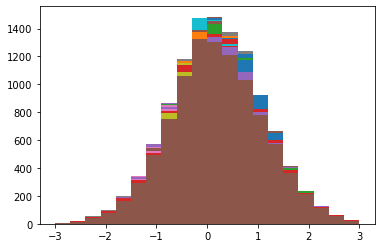

In [10]:
boot_hist_content = np.zeros( shape=(n_samples, hist_nbins))


for bi in range(n_samples) :
    
    #boot_hist_content.append()
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, bi)
    
    if not exists(fname) :  
        print('\n\n *** Missing %s' % fname )
        continue
        
    with open(fname,'rb') as f :
            
        final_push_weights_scaled = np.load(f)
        print(' boot %3d weights: ' % bi, end='')
        print( final_push_weights_scaled)
    
        hist_content,_,_ = plt.hist( train_pts[:,0], bins=hist_nbins, weights=final_push_weights_scaled, range=[hist_xlow, hist_xhigh] )
        #print(hist_content)
        boot_hist_content[bi,:] = hist_content
    

In [11]:
hist_corr_mat = np.zeros( shape=(hist_nbins, hist_nbins) )

for bi in range(hist_nbins) :
    
    for bj in range( hist_nbins ) :
        
        ccm = np.corrcoef( np.row_stack( ((boot_hist_content[:,bi], boot_hist_content[:,bj])) ) )
        
        hist_corr_mat[bi,bj] = ccm[0,1]

In [12]:
hist_corr_mat[0,hist_nbins-1] = -1.

<function matplotlib.pyplot.show(close=None, block=None)>

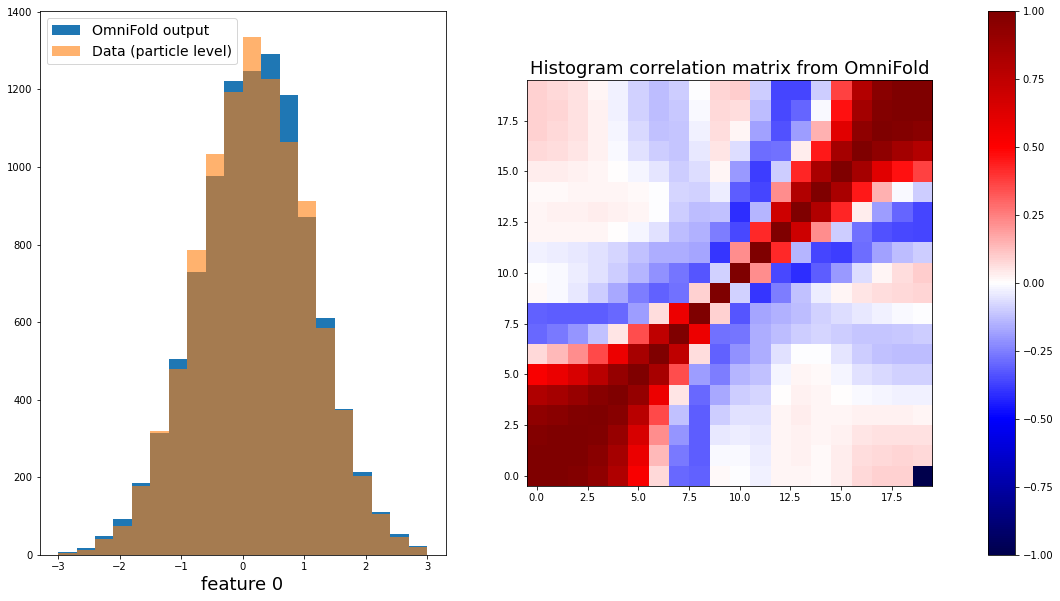

In [13]:
fig,ax = plt.subplots( 1, 2, figsize=(2*10,10))

ax[0].hist( train_pts[:,0], bins=hist_nbins, weights=main_sample_omnifold_weights, 
           range=[hist_xlow, hist_xhigh], label='OmniFold output' )
ax[0].hist( true_pts[:,0], bins=hist_nbins, 
           range=[hist_xlow, hist_xhigh], label='Data (particle level)', alpha=0.6 )

im = ax[1].imshow(hist_corr_mat, cmap='seismic', origin='lower')
ax[1].figure.colorbar( im, ax=ax )


ax[0].legend( fontsize=14 )
ax[0].set_xlabel( 'feature 0', fontsize=18 )
ax[1].set_title('Histogram correlation matrix from OmniFold', fontsize=18)



plt.show

In [14]:
print('      ', end='')
for bj in range( hist_nbins ) :
    print('   %2d   ' % bj, end='')
print()

for bi in range( hist_nbins ) :
    print(' %2d : ' % bi, end='')
    for bj in range( hist_nbins ) :
        print( ' %6.3f ' % hist_corr_mat[bi,bj], end='')
    print()

          0       1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19   
  0 :   1.000   0.997   0.982   0.937   0.810   0.519   0.074  -0.296  -0.310   0.010  -0.001  -0.027   0.021   0.022   0.012   0.037   0.075   0.091   0.094  -1.000 
  1 :   0.997   1.000   0.994   0.961   0.850   0.576   0.133  -0.262  -0.313  -0.014  -0.014  -0.034   0.022   0.026   0.015   0.034   0.065   0.077   0.078   0.078 
  2 :   0.982   0.994   1.000   0.985   0.902   0.656   0.220  -0.208  -0.317  -0.047  -0.033  -0.044   0.022   0.030   0.017   0.028   0.049   0.057   0.056   0.055 
  3 :   0.937   0.961   0.985   1.000   0.961   0.768   0.354  -0.119  -0.315  -0.095  -0.059  -0.059   0.019   0.032   0.019   0.020   0.026   0.028   0.024   0.022 
  4 :   0.810   0.850   0.902   0.961   1.000   0.911   0.567   0.049  -0.292  -0.166  -0.095  -0.084   0.005   0.029   0.019   0.004  -0.010  -0.018  -0.025  -0.030